In [3]:
##Here is my HW1
#This is the first HW
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

y = 87.688145 * x + 34754.077892


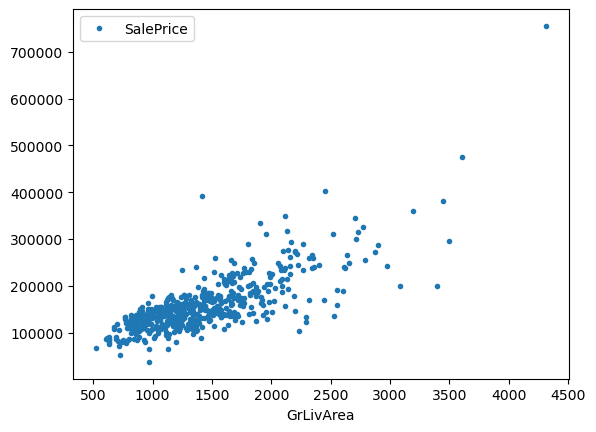

In [4]:
data = pd.read_csv('slimmed_realestate_data.csv')
data.plot(x='GrLivArea', y='SalePrice',style='.')
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

In [5]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

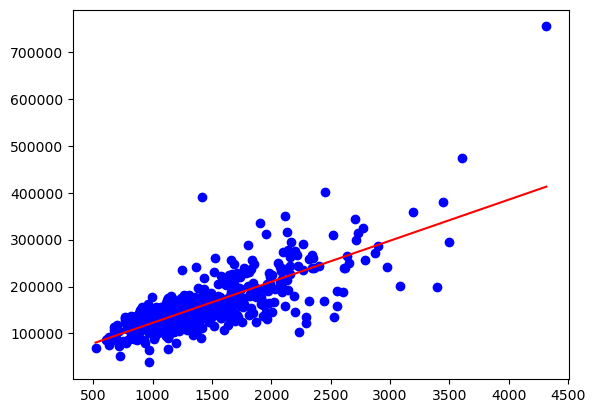

In [6]:
plot_data(x,y,m,b)

batch_size 32


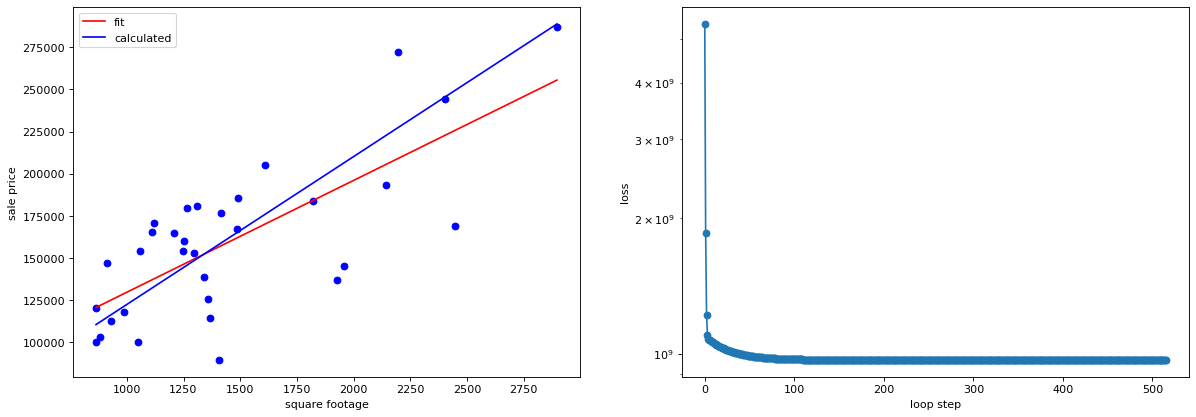

batch_size 64


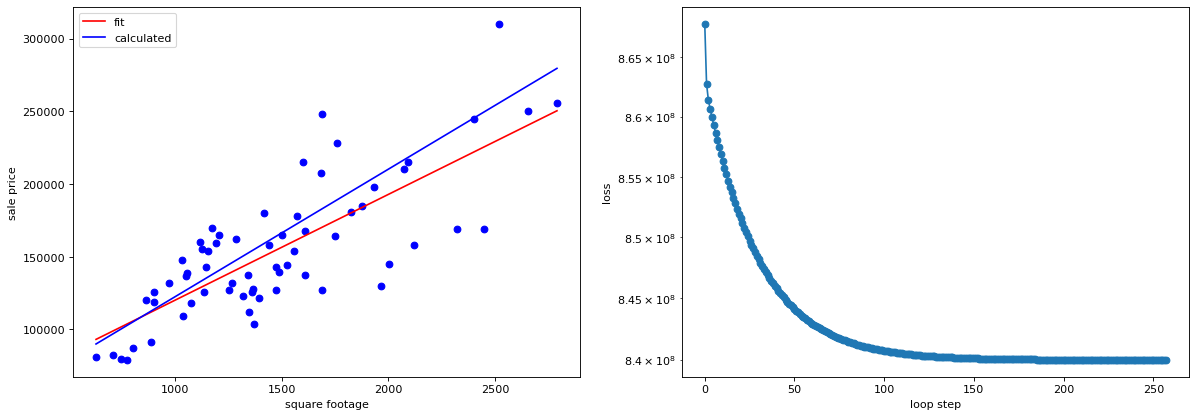

batch_size 128


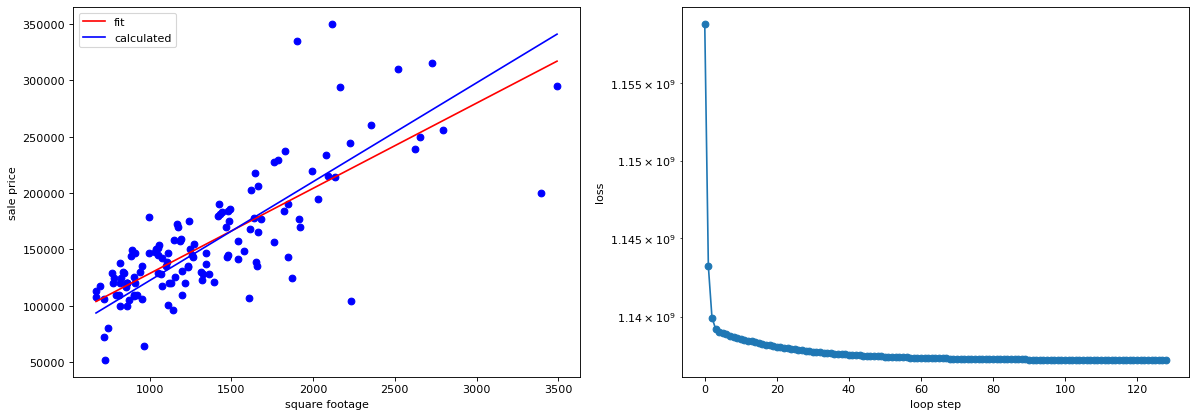

batch_size 256


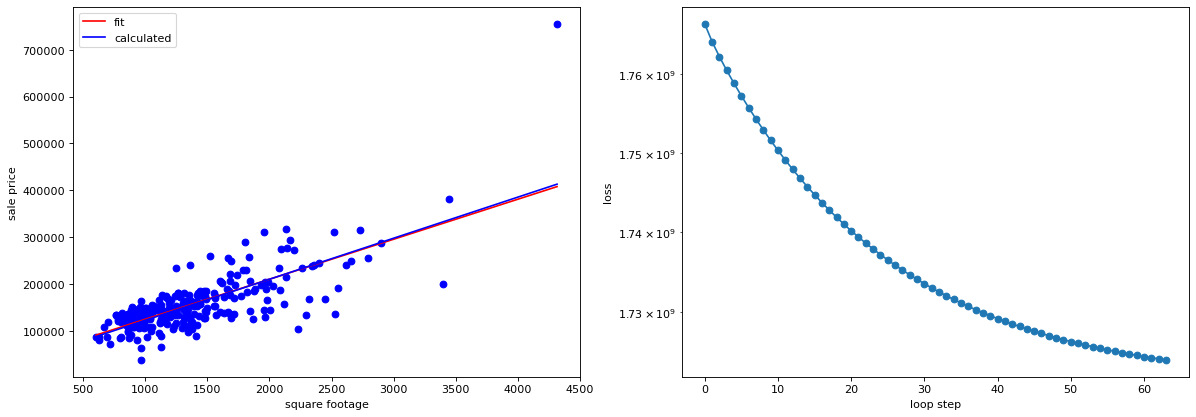

batch_size 512


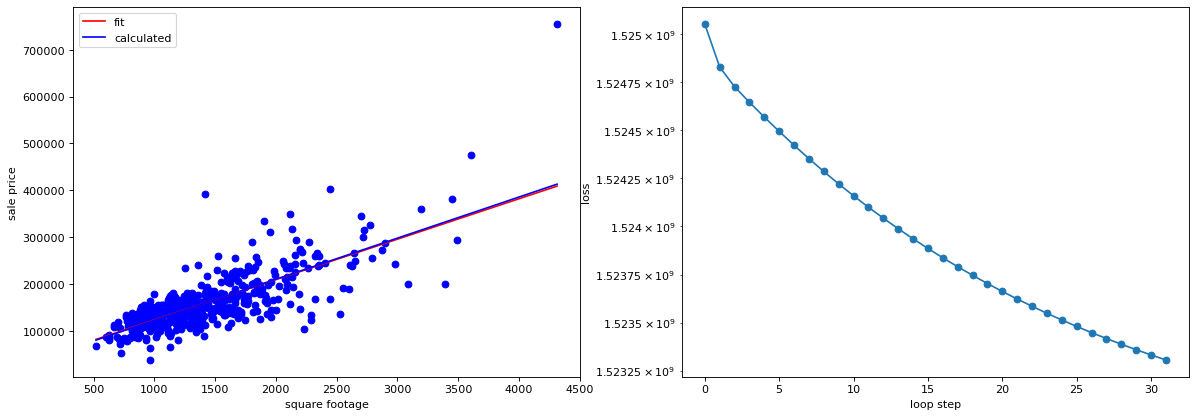

In [7]:
# set our initial slope and intercept
m = 5.
b = 1000.

# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
for batch_size in [32,64,128,256,512]:
    print("batch_size",batch_size)
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    # we run our loop N times
    loop_N = 30*len(data)//batch_size
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       m = updated_m(data_x,data_y,m,b,learning_rate_m)
       b = updated_b(data_x,data_y,m,b,learning_rate_b)

       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))

       # keep a history of our loss values
       loss_history.append(loss_value)


    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price') 

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()



batch_size 64
learning_rate_b 0.1
learning_rate_m 1e-07


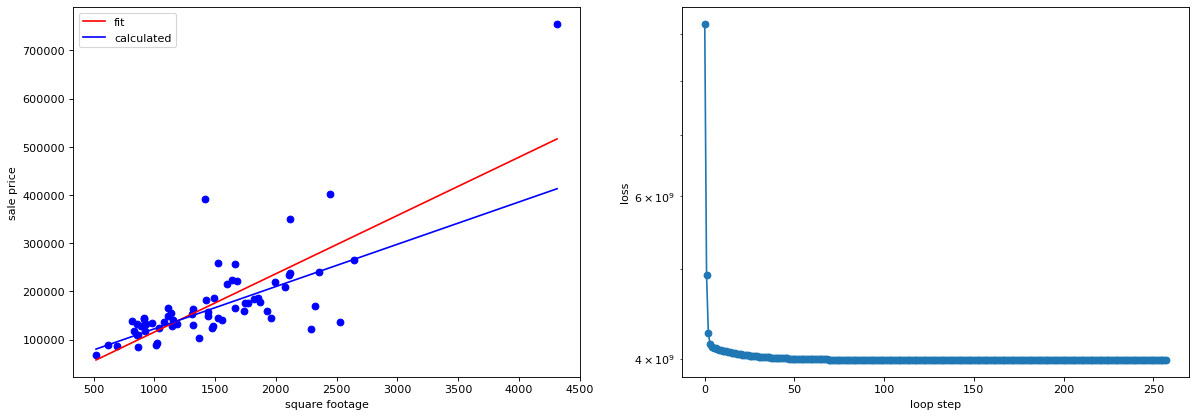

batch_size 128
learning_rate_b 0.2
learning_rate_m 2e-07


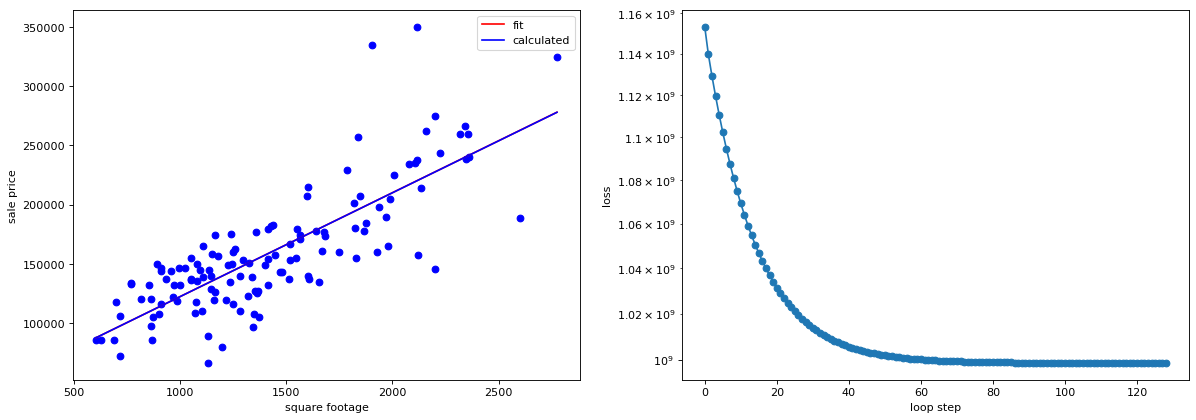

batch_size 256
learning_rate_b 0.4
learning_rate_m 4e-07


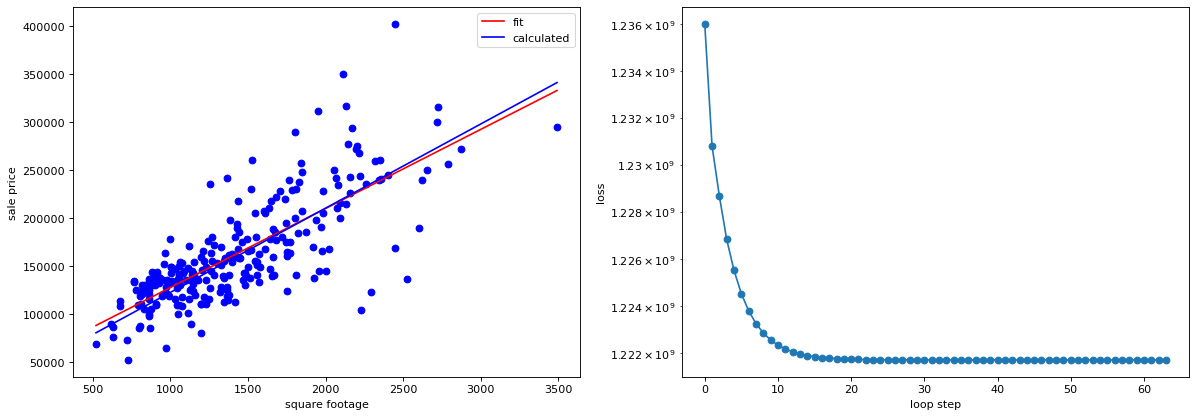

batch_size 512
learning_rate_b 0.8
learning_rate_m 8e-07


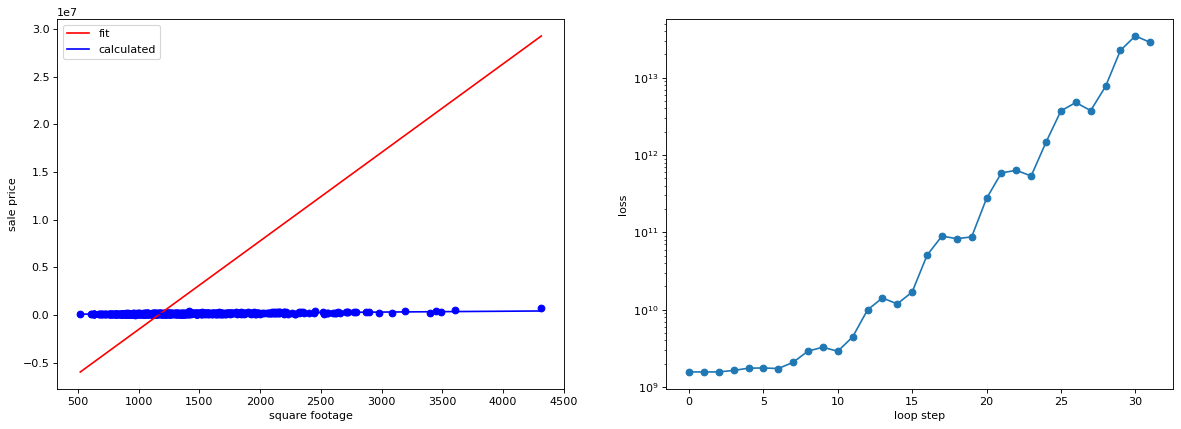

In [8]:
# set our initial slope and intercept
m = 5.
b = 1000.

# set a learning rate for each parameter
learning_rate_m_base = 1e-7
learning_rate_b_base = 1e-1
batch_size_base=64
for linearscale in [1,2,4,8]:
    learning_rate_b=learning_rate_b_base*linearscale
    learning_rate_m=learning_rate_m_base*linearscale
    batch_size=batch_size_base*linearscale
    print("batch_size",batch_size)
    print("learning_rate_b",learning_rate_b)
    print("learning_rate_m",learning_rate_m)
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    # we run our loop N times
    loop_N = 30*len(data)//batch_size
    for i in range(loop_N):
       # update our slope and intercept based on the current values
       m = updated_m(data_x,data_y,m,b,learning_rate_m)
       b = updated_b(data_x,data_y,m,b,learning_rate_b)

       # calculate the loss value
       loss_value = np.mean(loss(data_x,data_y,m,b))

       # keep a history of our loss values
       loss_history.append(loss_value)


    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])  
 
     # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price') 

   # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()

